In [278]:
import numpy as np
import pyaudio
import time
from pyldpc import make_ldpc, encode, decode, get_message
import matplotlib.pyplot as plt 

# Ses kayıt parametreleri

FORMAT = pyaudio.paInt16
CHANNELS = 1
# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 3000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 3000  # Frekans sapması (Hz)


# LDPC kodlama parametreleri
n = 32
d_v = 8
d_c = 16
snr = 20
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()
# Çıkış akışını aç
stream = p.open(
format=FORMAT,
channels=CHANNELS,
rate=rate,
output=True,
frames_per_buffer=CHUNK
    )
def ses_gonder(data,fc,kf,t,A):
    m = np.repeat(data, CHUNK // len(bits))
    
    # FM modülasyonunu uygula
    s = A * np.cos(2 * np.pi * (fc + kf * m) * t)*32767

    # Modüle edilmiş dalgayı ses cihazına gönderme
    stream.write(s.astype(np.int16).tobytes())

def onluk_binarye_cevir(onluk_sayi):
  """Verilen onluk sayıyı 16 bitlik bir binary diziye çevirir.

  Args:
      onluk_sayi: Dönüştürülecek onluk sayı.

  Returns:
      16 bitlik binary dizi (liste).
  """
  binary_dizi = np.array([int(bit) for bit in bin(onluk_sayi)[2:].zfill(16)])
  return binary_dizi


# Kullanım örneği:
v = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0], dtype=np.int16)
sayac=0
for j in range(2000):  
            v=onluk_binarye_cevir(j)
            sayac+=1
            ses_gonder(v,fc,kf,t,A)  # Veriyi ses olarak gönder      
            time.sleep(0.002)
# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

In [170]:
onluk_binarye_cevir(8)

[0, 0, 0, 0, 1, 0, 0, 0]

print(len(sound_bits))


>>> import numpy as np
>>> from pyldpc import make_ldpc, encode, decode, get_message
>>> n = 32
>>> d_v = 4
>>> d_c = 8
>>> snr = 1000
>>> H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
>>> k = G.shape[1]
>>> v = np.random.randint(2, size=k)
>>> y = encode(G, v, snr)
>>> d = decode(H, y, snr)
>>> x = get_message(G, d)
>>> assert abs(x - v).sum() == 0

print(len(y))

print(len(v))

d = decode(H, y, 20)
x = get_message(G, d)
x


print(len(y))

y

aci = np.arcsin(0.5)  

In [19]:
modüle_edilmis_dalga

array([    -0.        , -21417.70013415, -32418.20922816, ...,
       -25324.60528974,  -5574.95445348,  16886.25575742])

In [20]:
m2=modüle_edilmis_dalga/32767

In [21]:
m2

array([-0.        , -0.65363628, -0.98935543, ..., -0.77286921,
       -0.1701393 ,  0.51534336])

In [22]:
t = np.arange(0, 2048) / RATE
tasiyici_dalga = np.sin(2 * np.pi * 5000 * t)
tasiyici_dalga=np.where(tasiyici_dalga==0,1e-10,tasiyici_dalga)




In [26]:
genis_veri=(m2/tasiyici_dalga +1)/2
genis_veri=np.where(genis_veri <=0,-1,genis_veri)


In [30]:
a=al(genis_veri)

a


array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [32]:
def al(data):
	n = 32
	d_v = 4
	d_c = 8
	snr = 20
	H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
	gruplar = [data[i:i+64] for i in range(0, len(data), 64)]
	ana_ort=np.abs(np.mean(data))
	ortalamalar =[]
	
	for grup in gruplar:
		ortalama=np.mean(grup)
		if ortalama <=0:
			ortalamalar.append(ortalama)
		else:
			ortalamalar.append(ortalama)
	ortalamalar=np.array(ortalamalar)	
	#print(ortalamalar[0])	
	d = decode(H, ortalamalar, snr)
	x=get_message(G, d)
			
	return x

In [177]:

bits =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,0]
tasiyici_frekans = 2000

In [191]:

# Veriyi genişlet (CHUNK uzunluğunda)
genisletilmis_veri = np.repeat(bits, 512 // len(bits))

t = np.arange(0, len(genisletilmis_veri)) / RATE
sinyal = np.sin(2 * np.pi * tasiyici_frekans * t)

m = np.cos(tasiyici_dalga * (genisletilmis_veri *2*t))


In [186]:
# Parametreleri tanımla
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 1  # Modüle edici sinyal frekansı (Hz)
fs = 44100 # Örnekleme frekansı (Hz)
t = np.arange(0, 512)/fs  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 10  # Frekans sapması (Hz)

# Modüle edici sinyali oluştur
m = genisletilmis_veri = np.repeat(bits, 512 // len(bits))#A * np.sin(2 * np.pi * fm * t)

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kf * np.cumsum(m))

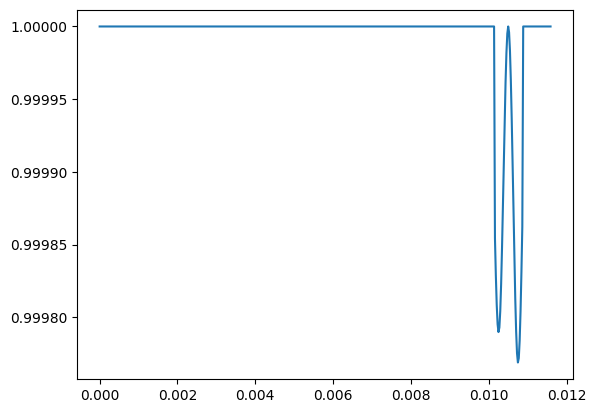

In [192]:
plt.plot(t,m)

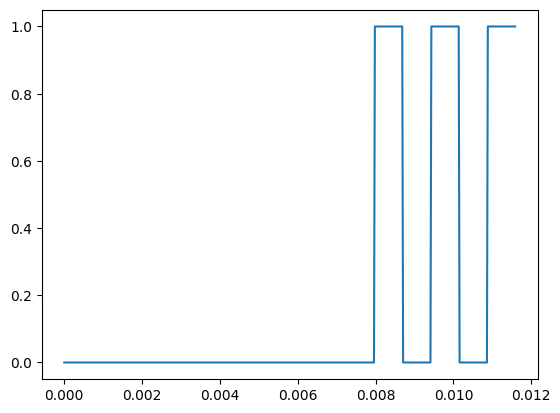

In [118]:
plt.plot(t,genisletilmis_veri)

In [87]:
genisletilmis_veri

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

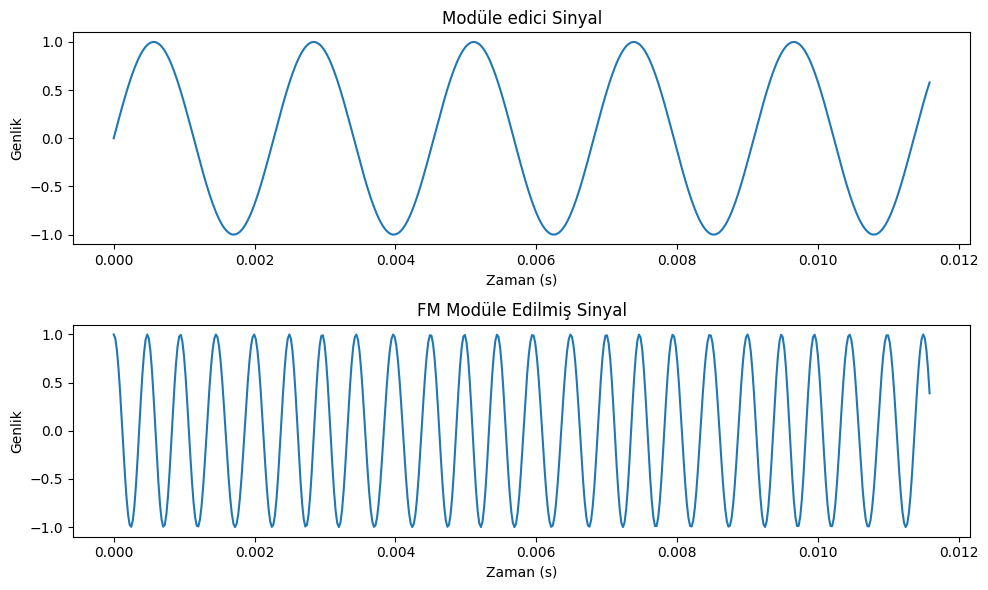

In [193]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)

# Modüle edici sinyali oluştur
m = A * np.sin(2 * np.pi * fm * t)

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kf * np.cumsum(m) / rate)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(2, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.tight_layout()
plt.show()

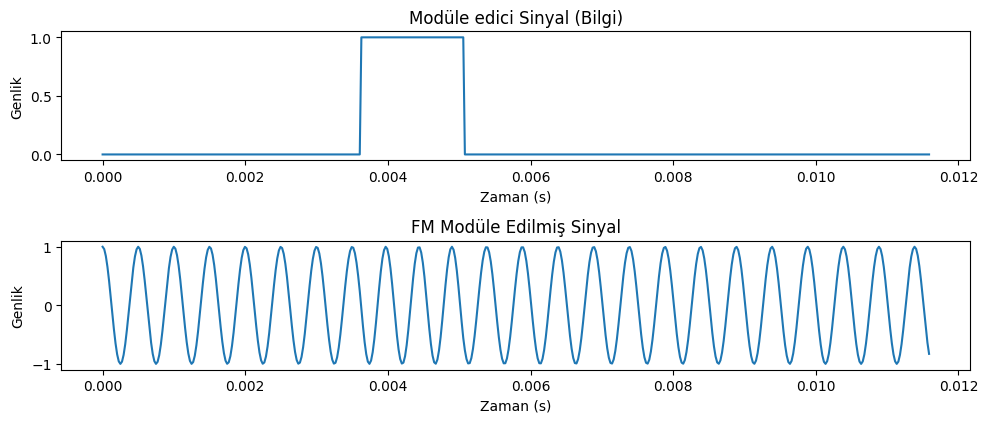

In [202]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)



# Modüle edilecek bilgiyi tanımla
data = [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    # Değişiklik burada:
    m[start_idx:end_idx] = data[i] * A

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kf * np.cumsum(m) / rate)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')



plt.tight_layout()
plt.show()

In [203]:
m

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0.

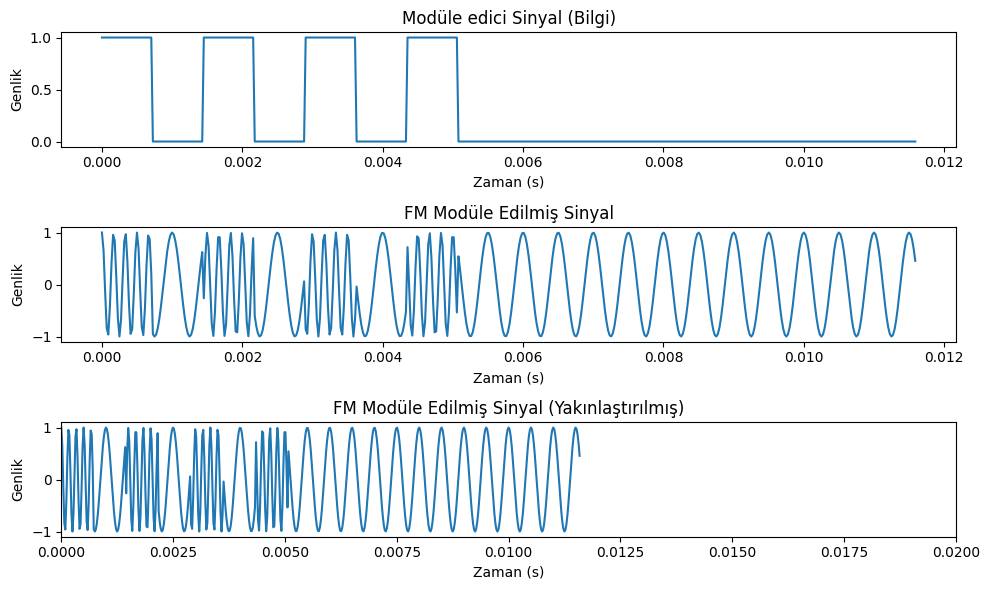

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 4000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    # Değişiklik burada:
    m[start_idx:end_idx] = data[i] 

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)  # Değişiklik burada

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 3)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal (Yakınlaştırılmış)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')
plt.xlim(0, 0.02)  # İlk 20 ms'i yakınlaştır

plt.tight_layout()
plt.show()

In [211]:
s

array([ 1.        ,  0.65632781, -0.13846762, -0.8380881 , -0.96165344,
       -0.42423168,  0.40478334,  0.95557281,  0.84955467,  0.1595999 ,
       -0.64005497, -0.99977164, -0.67230089,  0.1172721 ,  0.82623877,
        0.96729486,  0.44348626, -0.38515014, -0.94905575, -0.86063322,
       -0.18065928,  0.6234898 ,  0.99908667,  0.68796692, -0.09602303,
       -0.81401209, -0.97249451, -0.46253829,  0.36534102,  0.94210524,
        0.8713187 ,  0.20163615, -0.9534488 , -0.99977164, -0.96546335,
       -0.85329088, -0.67230089, -0.43709014, -0.16662826,  0.1172721 ,
        0.39171453,  0.63456535,  0.82623877,  0.95127641,  0.99959404,
        0.96729486,  0.8569838 ,  0.67755737,  0.44348626,  0.17364818,
       -0.11019455, -0.38515014, -0.62904354, -0.82220487, -0.94905575,
       -0.99936571, -0.96907729, -0.86063322, -0.68277947, -0.44985987,
       -0.18065928,  0.1031114 ,  0.3785662 ,  0.6234898 , -0.26397612,
        0.55445913,  0.99179001,  0.7474196 , -0.01068549, -0.76

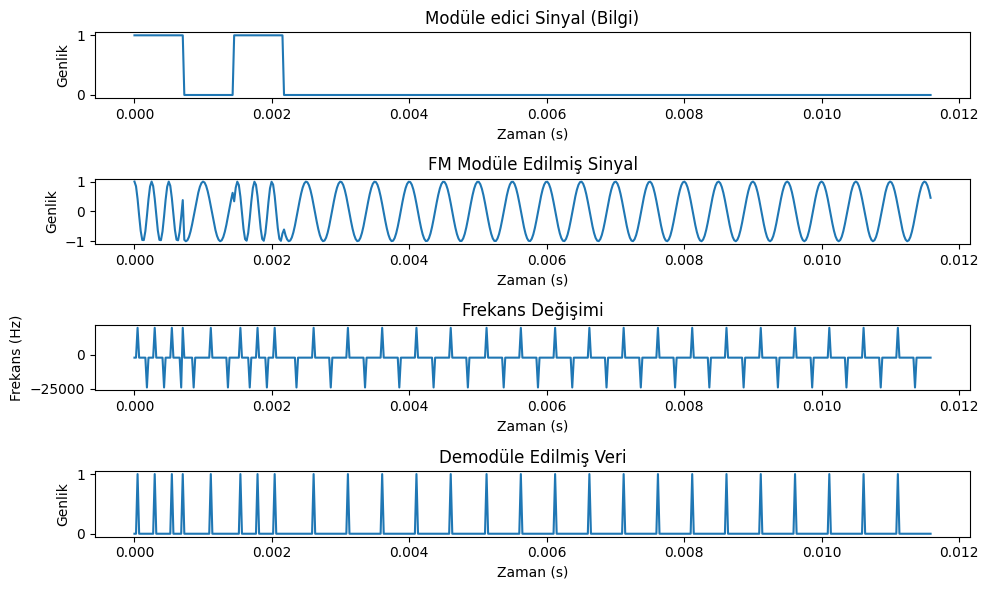

In [227]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 2000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

m = np.repeat(data, CHUNK // len(bits))

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# FM demodülasyonunu uygula
# 1. Frekansı tahmin etme:
estimated_fc = np.diff(np.unwrap(np.angle(s))) * rate / (2 * np.pi)
# 2. Frekans değişimini hesaplama:
frequency_change = estimated_fc - fc
# **Boyut eşleştirme:**
frequency_change = np.append(frequency_change, frequency_change[-1])

# 3. Veriyi geri kazanma:
# Eşik değeri kullanarak veriyi geri kazan:
threshold = np.mean(frequency_change)  # Frekans değişiminin ortalamasını eşik değeri olarak kullan
demodulated_data = (frequency_change > threshold).astype(int)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 3)
plt.plot(t, frequency_change)
plt.title('Frekans Değişimi')
plt.xlabel('Zaman (s)')
plt.ylabel('Frekans (Hz)')

plt.subplot(4, 1, 4)
plt.plot(t, demodulated_data)
plt.title('Demodüle Edilmiş Veri')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.tight_layout()
plt.show()

In [225]:
m

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

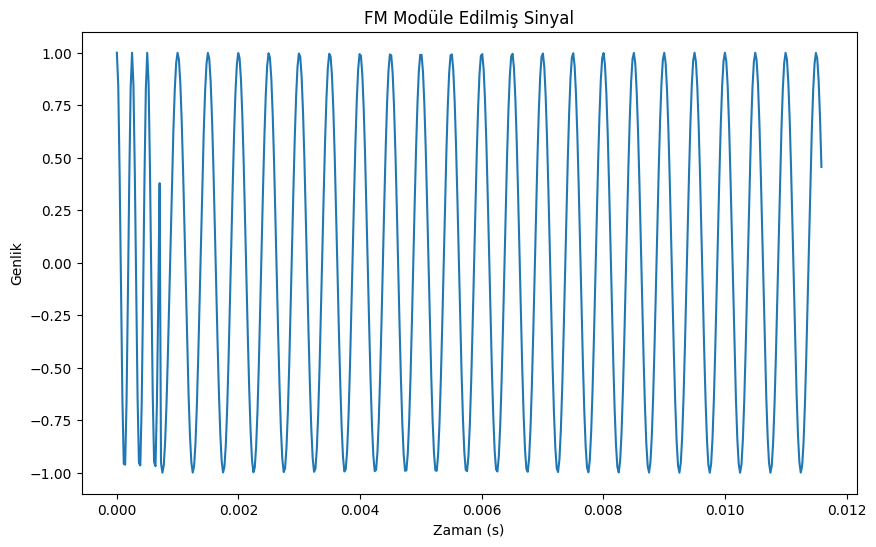

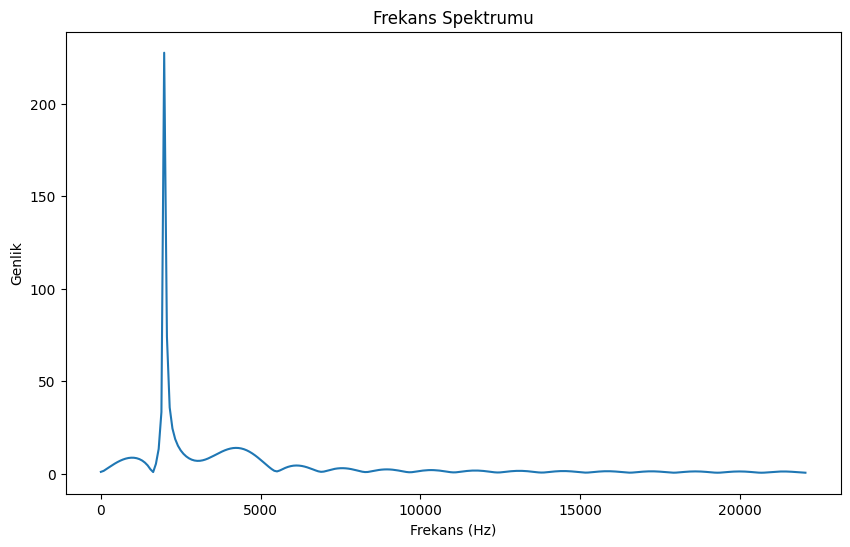

In [216]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 2000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    m[start_idx:end_idx] = data[i] 

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# Demodülasyon:
# 1. FFT hesapla:
frekans = np.fft.rfftfreq(len(s), 1/rate)
spektrum = np.fft.rfft(s)

# 2. Taşıyıcı sinyalin frekansı etrafındaki bölgeyi bul:
# (Bu örnekte, taşıyıcı frekans etrafında 100 Hz'lik bir bölge seçiliyor)
frekans_aralık = (frekans > fc - 100) & (frekans < fc + 100) 
spektrum_aralik = spektrum[frekans_aralık]
frekans_aralik = frekans[frekans_aralık]

# 3. Maksimum genlikli frekansı bul:
en_yüksek_genlik_indeksi = np.argmax(np.abs(spektrum_aralik))
en_yüksek_frekans = frekans_aralik[en_yüksek_genlik_indeksi]

# 4. Frekans kaymasının yönünü belirle:
# (Eğer en yüksek genlikli frekans taşıyıcı frekansından büyükse, 1 bit, 
#  küçükse 0 bit olarak kabul edilebilir)
bit = 1 if en_yüksek_frekans > fc else 0

# ... (Bu işlemi her bit için tekrarla) ...

# Demodüle edilmiş veriyi çiz:
plt.figure(figsize=(10, 6))
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.figure(figsize=(10, 6))
plt.plot(frekans, np.abs(spektrum))
plt.title('Frekans Spektrumu')
plt.xlabel('Frekans (Hz)')
plt.ylabel('Genlik')

plt.show()

In [220]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 1024
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    m[start_idx:end_idx] = data[i] 

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# Demodülasyon:
demodulated_data = []
for i in range(len(data)):
    # Her bit için sinyal kesiti al:
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    s_kesit = s[start_idx:end_idx]

    # FFT hesapla:
    frekans = np.fft.rfftfreq(len(s_kesit), 1/rate)
    spektrum = np.fft.rfft(s_kesit)

    # Taşıyıcı frekans etrafındaki bölgeyi bul:
    frekans_aralık = (frekans > fc - 100) & (frekans < fc + 100) 
    spektrum_aralik = spektrum[frekans_aralık]
    frekans_aralik = frekans[frekans_aralık]

    # Maksimum genlikli frekansı bul:
    en_yüksek_genlik_indeksi = np.argmax(np.abs(spektrum_aralik))
    en_yüksek_frekans = frekans_aralik[en_yüksek_genlik_indeksi]

    # Frekans kaymasının yönünü belirle:
    bit = 1 if en_yüksek_frekans > fc else 0

    demodulated_data.append(bit)

# Sonuçları yazdır:
print("Orijinal Veri:", data)
print("Demodüle Edilmiş Veri:", demodulated_data)

Orijinal Veri: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Demodüle Edilmiş Veri: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
